# 01. Data Collection & EDA

Початковий аналіз даних для проекту Stock Price Prediction & Algorithmic Trading.

## План EDA:
1. **Збір та завантаження даних** - отримання історичних даних по акціях
2. **Базовий огляд даних** - структура, статистика, пропущені значення
3. **Візуалізація цінових трендів** - графіки цін та обсягів торгів
4. **Технічні індикатори** - розрахунок та візуалізація індикаторів
5. **Кореляційний аналіз** - взаємозв'язки між змінними
6. **Висновки та рекомендації** - підготовка до моделювання


In [1]:
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

from src.data_loader import load_stock_data

# Налаштування для візуалізації
plt.style.use('default')
%matplotlib inline


In [2]:
# 1. ЗБІР ТА ЗАВАНТАЖЕННЯ ДАНИХ
print("="*50)
print("1. ЗБІР ТА ЗАВАНТАЖЕННЯ ДАНИХ")
print("="*50)

# Завантажуємо дані по Apple (AAPL) за останні 5 років
print("Завантажуємо історичні дані AAPL...")
df = load_stock_data('AAPL', '2020-01-01', '2024-01-01')

print(f"\n✅ Дані успішно завантажено!")
print(f"📊 Розмір датасету: {df.shape}")
print(f"📅 Період даних: {df.index.min().strftime('%Y-%m-%d')} до {df.index.max().strftime('%Y-%m-%d')}")
print(f"📈 Кількість торгових днів: {len(df)}")

print("\n🔍 Перші 5 записів:")
df.head()


1. ЗБІР ТА ЗАВАНТАЖЕННЯ ДАНИХ
Завантажуємо історичні дані AAPL...
Завантажено: AAPL (1006 записів)

✅ Дані успішно завантажено!
📊 Розмір датасету: (1006, 5)
📅 Період даних: 2020-01-02 до 2023-12-29
📈 Кількість торгових днів: 1006

🔍 Перші 5 записів:


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


In [5]:
# 2. БАЗОВИЙ ОГЛЯД ДАНИХ
print("="*50)
print("2. БАЗОВИЙ ОГЛЯД ДАНИХ")
print("="*50)

# Інформація про структуру даних
print("📋 Структура даних:")
print(f"   • Тип індексу: {type(df.index).__name__}")
print(f"   • Колонки: {list(df.columns)}")
print(f"   • Типи даних:")
for col in df.columns:
    print(f"     - {col}: {df[col].dtype}")

print(f"\n💾 Використання пам'яті: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Перевірка на пропущені значення
print(f"\n🔍 Перевірка на пропущені значення:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("   ✅ Пропущених значень немає!")
else:
    print("   ⚠️  Знайдено пропущені значення:")
    for col, missing in missing_values.items():
        if missing > 0:
            print(f"     - {col}: {missing} ({missing/len(df)*100:.1f}%)")

# Базова статистика
print(f"\n📊 Описова статистика:")
print(df.describe().round(2))


2. БАЗОВИЙ ОГЛЯД ДАНИХ
📋 Структура даних:
   • Тип індексу: DatetimeIndex
   • Колонки: ['Close', 'High', 'Low', 'Open', 'Volume']
   • Типи даних:
     - Close: float64
     - High: float64
     - Low: float64
     - Open: float64
     - Volume: int64

💾 Використання пам'яті: 0.05 MB

🔍 Перевірка на пропущені значення:
   ✅ Пропущених значень немає!

📊 Описова статистика:
Price    Close     High      Low     Open        Volume
count  1006.00  1006.00  1006.00  1006.00  1.006000e+03
mean    138.38   139.86   136.74   138.25  9.895211e+07
std      33.46    33.58    33.32    33.45  5.439653e+07
min      54.38    55.38    51.53    55.28  2.404830e+07
25%     120.76   122.01   119.23   120.87  6.407675e+07
50%     143.25   144.83   141.58   143.10  8.467540e+07
75%     163.69   165.97   162.43   163.96  1.155069e+08
max     196.67   198.17   195.57   196.58  4.265100e+08


In [7]:
# Додаткові характеристики даних для другого пункту
print("📈 Аналіз цінових характеристик:")

# Перевіряємо структуру колонок
print(f"Структура колонок: {df.columns}")
print(f"Тип колонок: {type(df.columns)}")

# Спрощуємо доступ до колонок - перевіряємо чи є MultiIndex
if hasattr(df.columns, 'levels'):  # MultiIndex
    df_clean = df.copy()
    df_clean.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
    df = df_clean
    print("✅ Колонки спрощено з MultiIndex")

print(f"Нові колонки: {list(df.columns)}")

# Ціновий діапазон
high_max = df['High'].max()
low_min = df['Low'].min()
price_range = high_max - low_min

print(f"   • Максимальна ціна (High): ${high_max:.2f}")
print(f"   • Мінімальна ціна (Low): ${low_min:.2f}")
print(f"   • Ціновий діапазон: ${price_range:.2f}")

# Волатільність
daily_returns = df['Close'].pct_change()
daily_volatility = daily_returns.std()
annual_volatility = daily_volatility * np.sqrt(252)

print(f"\n📊 Волатільність:")
print(f"   • Денна волатільність: {daily_volatility:.4f} ({daily_volatility*100:.2f}%)")
print(f"   • Річна волатільність: {annual_volatility:.4f} ({annual_volatility*100:.2f}%)")

# Обсяги торгів
volume_mean = df['Volume'].mean()
volume_median = df['Volume'].median()
volume_max = df['Volume'].max()
volume_min = df['Volume'].min()

print(f"\n💹 Аналіз обсягів торгів:")
print(f"   • Середній денний обсяг: {volume_mean:,.0f}")
print(f"   • Медіанний обсяг: {volume_median:,.0f}")
print(f"   • Максимальний обсяг: {volume_max:,.0f}")
print(f"   • Мінімальний обсяг: {volume_min:,.0f}")

# Тренди
close_first = df['Close'].iloc[0]
close_last = df['Close'].iloc[-1]
total_return = (close_last / close_first - 1) * 100

print(f"\n📈 Загальна прибутковість за період: {total_return:.2f}%")
print(f"\n✅ Базовий огляд даних завершено!")

📈 Аналіз цінових характеристик:
Структура колонок: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Тип колонок: <class 'pandas.core.indexes.base.Index'>
Нові колонки: ['Close', 'High', 'Low', 'Open', 'Volume']
   • Максимальна ціна (High): $198.17
   • Мінімальна ціна (Low): $51.53
   • Ціновий діапазон: $146.64

📊 Волатільність:
   • Денна волатільність: 0.0211 (2.11%)
   • Річна волатільність: 0.3357 (33.57%)

💹 Аналіз обсягів торгів:
   • Середній денний обсяг: 98,952,111
   • Медіанний обсяг: 84,675,400
   • Максимальний обсяг: 426,510,000
   • Мінімальний обсяг: 24,048,300

📈 Загальна прибутковість за період: 163.19%

✅ Базовий огляд даних завершено!


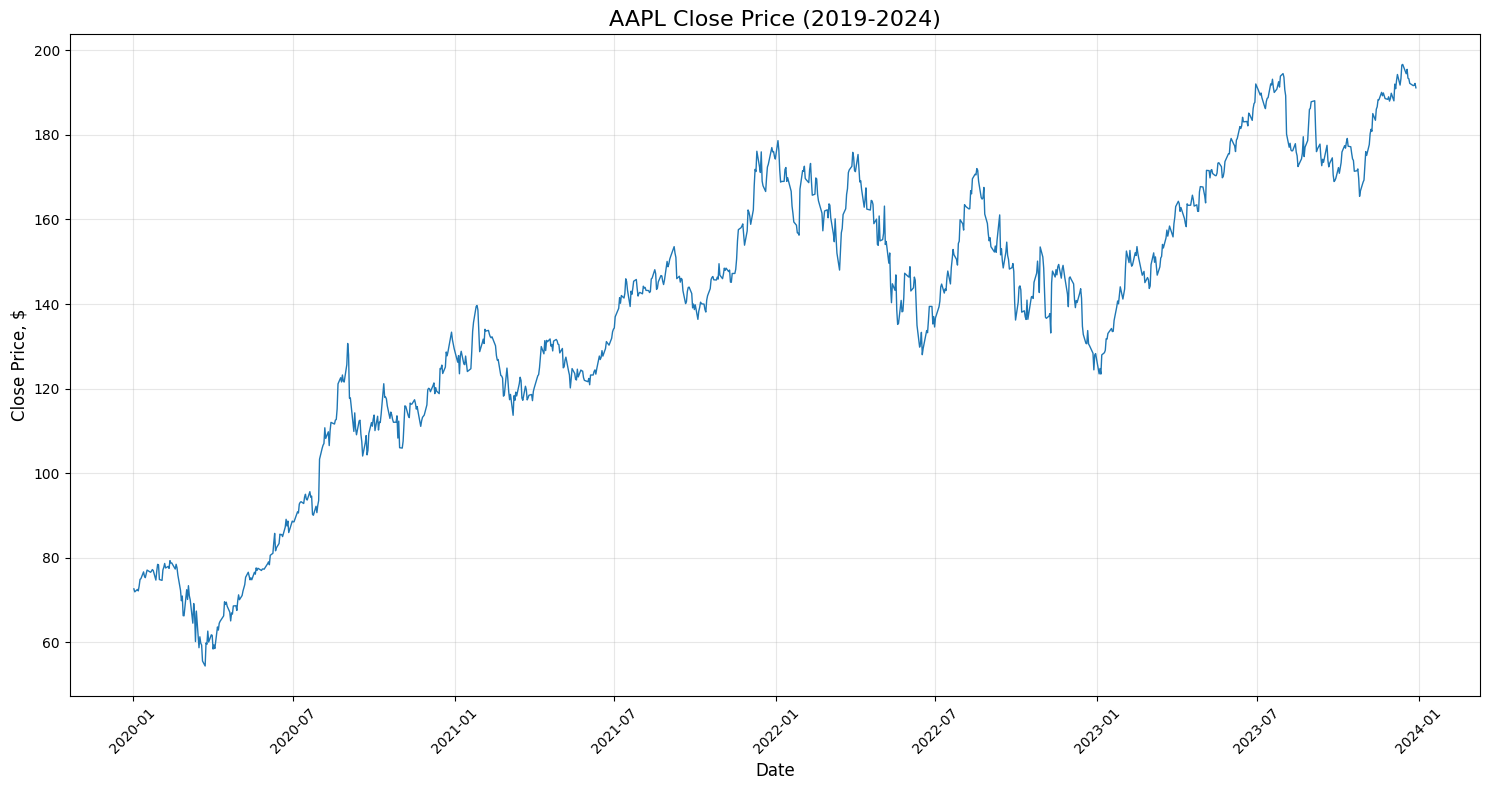

In [16]:
# Візуалізація ціни закриття з matplotlib (завжди працює в Jupyter)
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Close'], linewidth=1)
plt.title('AAPL Close Price (2019-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price, $', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


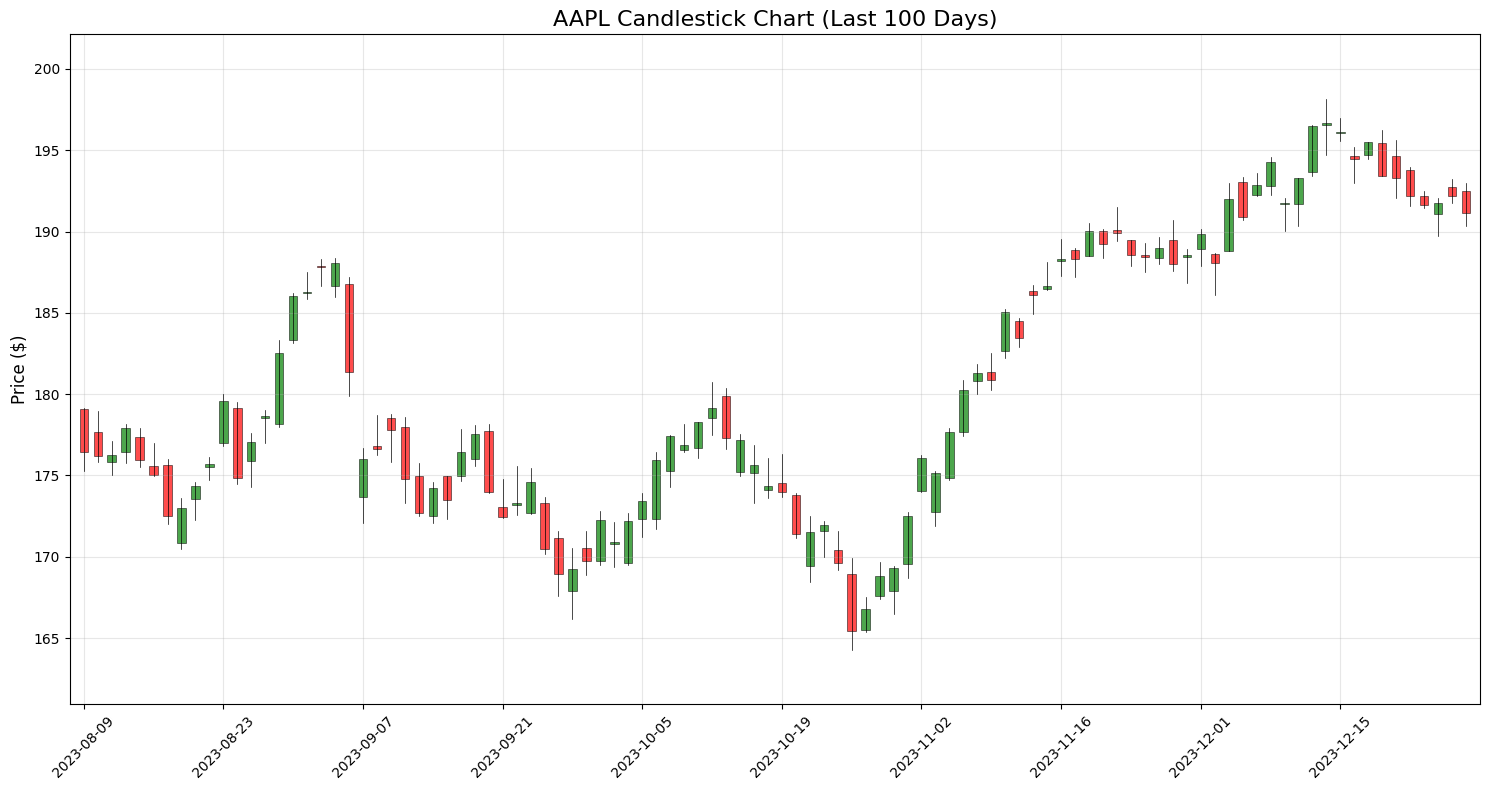

In [17]:
# Candlestick chart з matplotlib
from matplotlib.patches import Rectangle

def plot_candlestick_matplotlib(df, title="Stock Price", n_days=100):
    """Створює candlestick chart з matplotlib"""
    # Беремо останні n_days для кращої візуалізації
    df_plot = df.tail(n_days).copy()
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    for i, (date, row) in enumerate(df_plot.iterrows()):
        # Визначаємо колір
        color = 'green' if row['Close'] >= row['Open'] else 'red'
        
        # Малюємо тіло свічки
        height = abs(row['Close'] - row['Open'])
        bottom = min(row['Open'], row['Close'])
        
        rect = Rectangle((i-0.3, bottom), 0.6, height, 
                        facecolor=color, alpha=0.7, edgecolor='black', linewidth=0.5)
        ax.add_patch(rect)
        
        # Малюємо тіні
        ax.plot([i, i], [row['Low'], row['High']], color='black', linewidth=0.5)
    
    ax.set_xlim(-1, len(df_plot))
    ax.set_ylim(df_plot[['Low', 'High']].min().min() * 0.98, 
                df_plot[['Low', 'High']].max().max() * 1.02)
    
    # Налаштування осей
    step = max(1, len(df_plot) // 10)
    ax.set_xticks(range(0, len(df_plot), step))
    ax.set_xticklabels([df_plot.index[i].strftime('%Y-%m-%d') for i in range(0, len(df_plot), step)], 
                       rotation=45)
    
    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Price ($)', fontsize=12)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Створюємо candlestick chart
plot_candlestick_matplotlib(df, "AAPL Candlestick Chart (Last 100 Days)")


In [18]:
# Додаємо технічні індикатори
from src.feature_engineering import add_technical_indicators

df_with_indicators = add_technical_indicators(df)
print(f"Dataset shape after adding indicators: {df_with_indicators.shape}")
print(f"Columns: {list(df_with_indicators.columns)}")

# Перевіряємо останні рядки
df_with_indicators.tail()


Додавання ковзних середніх...
Додавання індикаторів моментуму...
Додавання індикаторів тренду...
Додавання індикаторів волатильності...
Додавання індикаторів об'єму...
Додавання цінових ознак...
Додавання статистичних ознак...
Додавання циклічних ознак...
Загалом створено 137 ознак
Dataset shape after adding indicators: (1006, 137)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'EMA_10', 'EMA_20', 'EMA_50', 'SMA_20_50_Cross', 'RSI_14', 'RSI_21', 'Stoch_K', 'Stoch_D', 'Williams_R', 'ROC_5', 'ROC_10', 'ROC_20', 'Momentum_5', 'Momentum_10', 'Momentum_20', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'ADX', 'Plus_DI', 'Minus_DI', 'PSAR', 'BB_Upper_10', 'BB_Lower_10', 'BB_Middle_10', 'BB_Width_10', 'BB_Position_10', 'BB_Upper_20', 'BB_Lower_20', 'BB_Middle_20', 'BB_Width_20', 'BB_Position_20', 'BB_Upper_50', 'BB_Lower_50', 'BB_Middle_50', 'BB_Width_50', 'BB_Position_50', 'ATR_14', 'ATR_21', 'HV_10', 'HV_20', 'HV_30', 'Volume_SMA_

Price,Close,High,Low,Open,Volume,SMA_5,SMA_10,SMA_20,SMA_50,SMA_100,...,Percentile_Rank_50,DayOfWeek,DayOfWeek_Sin,DayOfWeek_Cos,Month,Month_Sin,Month_Cos,Quarter,Quarter_Sin,Quarter_Cos
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,192.192551,193.989390,191.567126,193.761051,37122800,193.769006,194.323947,192.260555,183.959357,180.270174,...,0.80,4,-0.433884,-0.900969,12,-2.449294e-16,1.0,4,-2.449294e-16,1.0
2023-12-26,191.646561,192.480450,191.428159,192.202487,28919300,193.205136,194.311043,192.422372,184.245964,180.293891,...,0.74,1,0.781831,0.623490,12,-2.449294e-16,1.0,4,-2.449294e-16,1.0
2023-12-27,191.745819,192.093281,189.700797,191.090629,48087700,192.452646,194.156175,192.558872,184.537135,180.409489,...,0.74,2,0.974928,-0.222521,12,-2.449294e-16,1.0,4,-2.449294e-16,1.0
2023-12-28,192.172714,193.244865,191.765691,192.728641,34049900,192.204468,193.721361,192.767842,184.867974,180.560446,...,0.78,3,0.433884,-0.900969,12,-2.449294e-16,1.0,4,-2.449294e-16,1.0
2023-12-29,191.130325,192.986726,190.336138,192.490361,42628800,191.777594,193.167416,192.895904,185.203941,180.691573,...,0.68,4,-0.433884,-0.900969,12,-2.449294e-16,1.0,4,-2.449294e-16,1.0


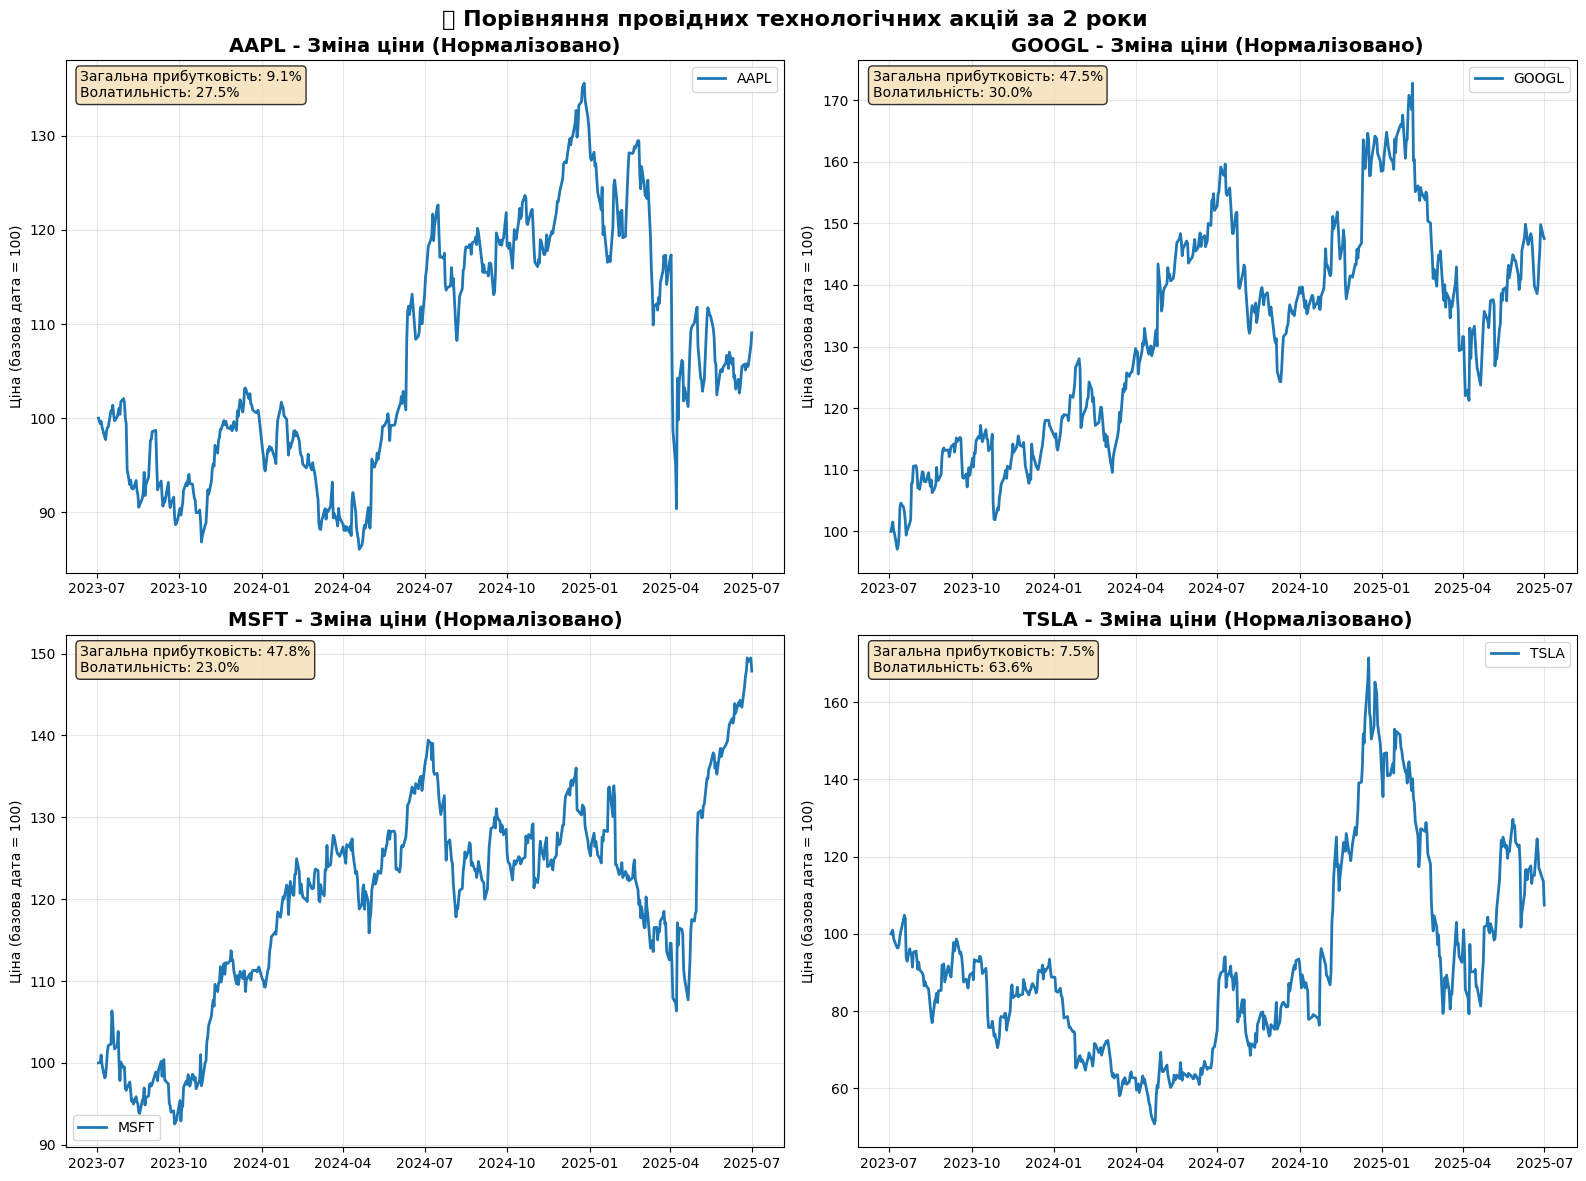

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Список тікерів
tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
data_dict = {}

# Завантаження даних
for ticker in tickers:
    stock = yf.Ticker(ticker)
    data_dict[ticker] = stock.history(period="2y")

# Створюємо порівняльні графіки
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    data = data_dict[ticker]
    # Нормалізуємо дані (базова дата = 100)
    normalized_price = (data['Close'] / data['Close'].iloc[0]) * 100

    axes[i].plot(data.index, normalized_price, linewidth=2, label=ticker)
    axes[i].set_title(f'{ticker} - Зміна ціни (Нормалізовано)', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Ціна (базова дата = 100)')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

    # Додаємо статистику
    total_return = float((data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100)
    volatility = float(data['Close'].pct_change().std() * np.sqrt(252) * 100)

    stats_text = f'Загальна прибутковість: {total_return:.1f}%\nВолатильність: {volatility:.1f}%'
    axes[i].text(0.02, 0.98, stats_text,
                 transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('🏆 Порівняння провідних технологічних акцій за 2 роки', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

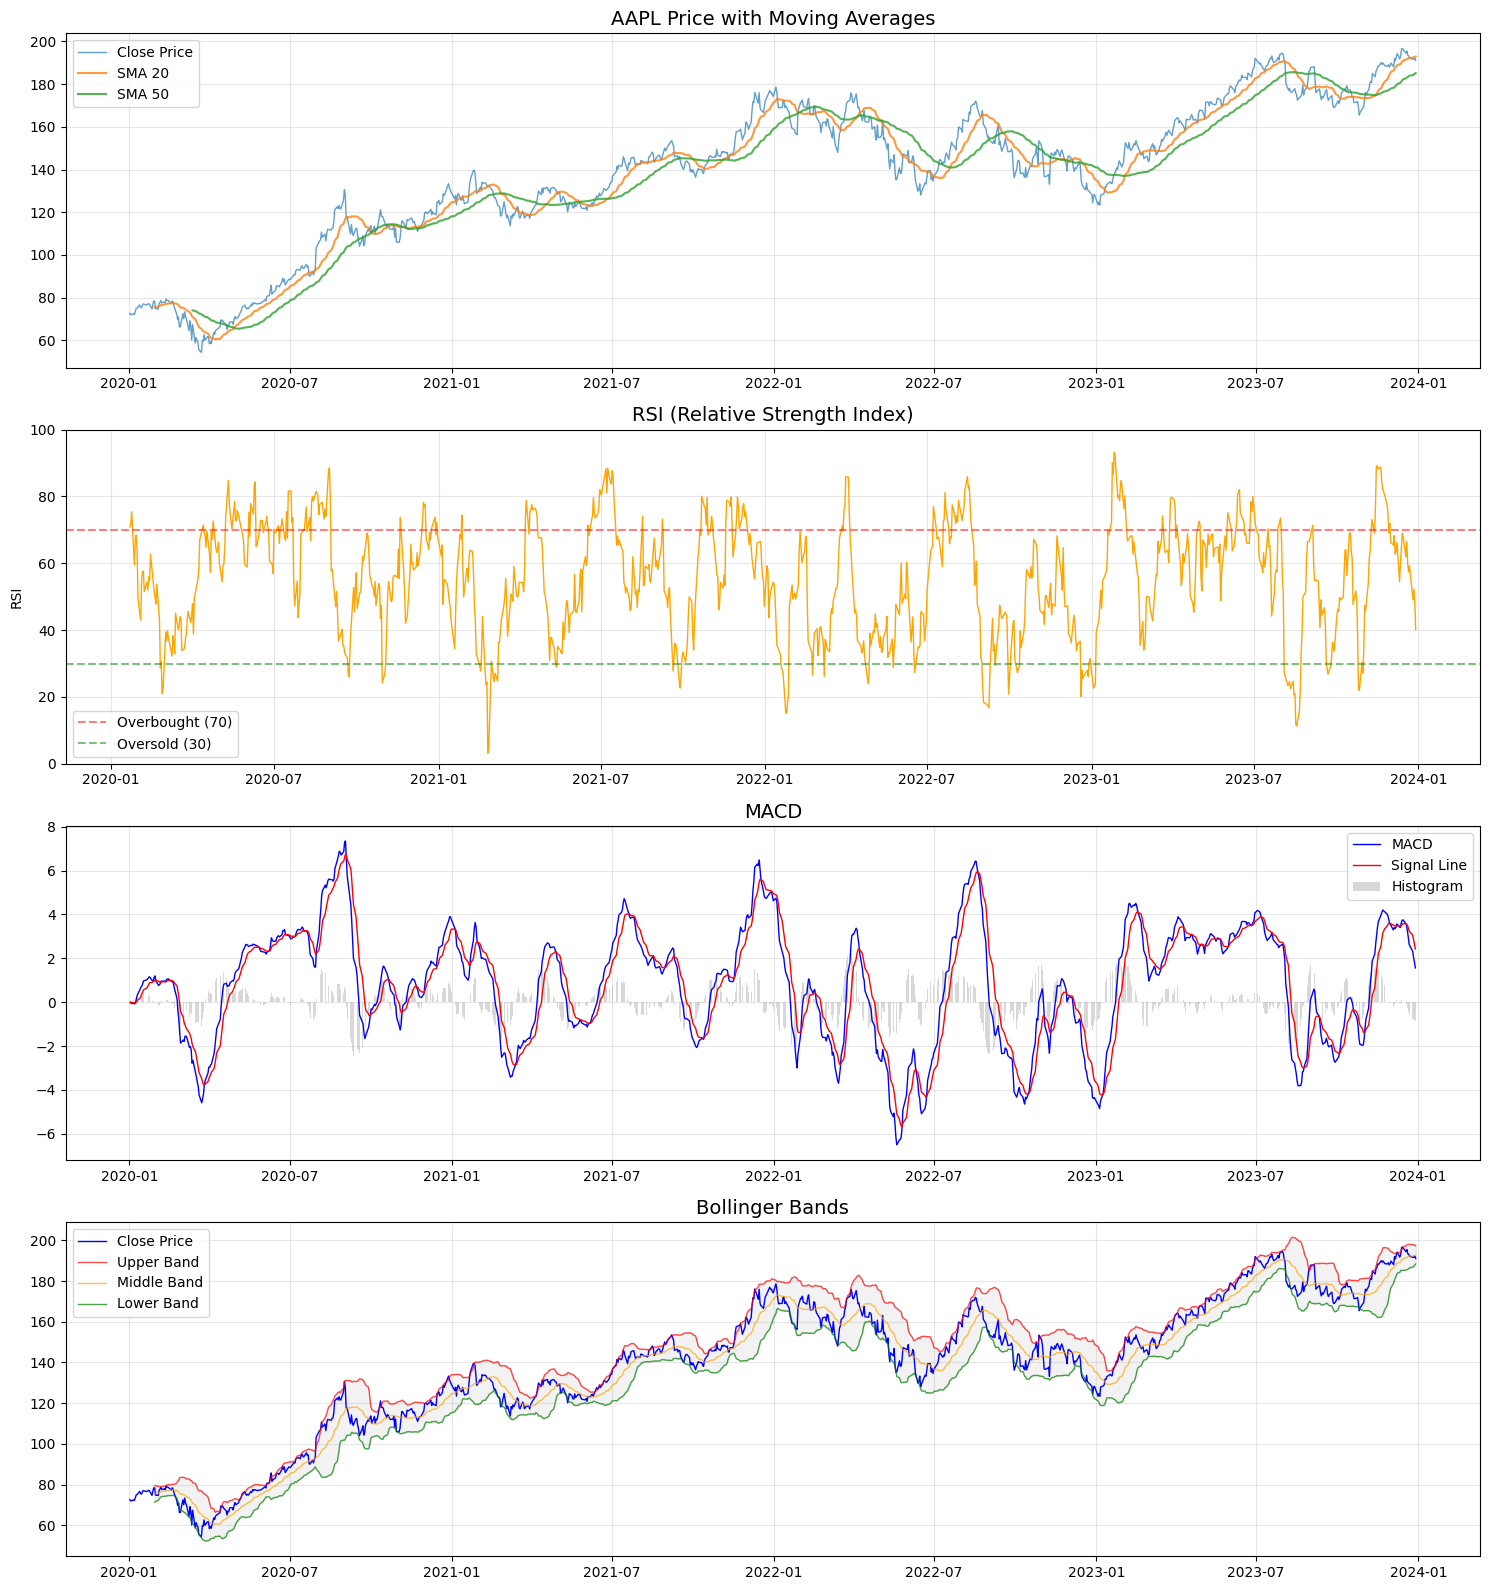

In [20]:
# Візуалізація технічних індикаторів з matplotlib
fig, axes = plt.subplots(4, 1, figsize=(15, 16))

# 1. Ціна з Moving Averages
axes[0].plot(df_with_indicators.index, df_with_indicators['Close'], label='Close Price', alpha=0.7, linewidth=1)
axes[0].plot(df_with_indicators.index, df_with_indicators['SMA_20'], label='SMA 20', alpha=0.8, linewidth=1.5)
axes[0].plot(df_with_indicators.index, df_with_indicators['SMA_50'], label='SMA 50', alpha=0.8, linewidth=1.5)
axes[0].set_title('AAPL Price with Moving Averages', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. RSI (використовуємо правильну назву колонки)
axes[1].plot(df_with_indicators.index, df_with_indicators['RSI_14'], color='orange', linewidth=1)
axes[1].axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought (70)')
axes[1].axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold (30)')
axes[1].set_title('RSI (Relative Strength Index)', fontsize=14)
axes[1].set_ylabel('RSI')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 100)

# 3. MACD
axes[2].plot(df_with_indicators.index, df_with_indicators['MACD'], label='MACD', color='blue', linewidth=1)
axes[2].plot(df_with_indicators.index, df_with_indicators['MACD_Signal'], label='Signal Line', color='red', linewidth=1)
axes[2].bar(df_with_indicators.index, df_with_indicators['MACD_Histogram'], label='Histogram', alpha=0.3, color='gray')
axes[2].set_title('MACD', fontsize=14)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 4. Bollinger Bands (використовуємо правильні назви колонок)
axes[3].plot(df_with_indicators.index, df_with_indicators['Close'], label='Close Price', color='blue', linewidth=1)
axes[3].plot(df_with_indicators.index, df_with_indicators['BB_Upper_20'], label='Upper Band', color='red', alpha=0.7, linewidth=1)
axes[3].plot(df_with_indicators.index, df_with_indicators['BB_Middle_20'], label='Middle Band', color='orange', alpha=0.7, linewidth=1)
axes[3].plot(df_with_indicators.index, df_with_indicators['BB_Lower_20'], label='Lower Band', color='green', alpha=0.7, linewidth=1)
axes[3].fill_between(df_with_indicators.index, df_with_indicators['BB_Upper_20'], df_with_indicators['BB_Lower_20'], alpha=0.1, color='gray')
axes[3].set_title('Bollinger Bands', fontsize=14)
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [21]:
# Інтерактивний графік з Plotly
fig = go.Figure(data=go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']))

fig.update_layout(
    title='AAPL Candlestick Chart (2019-2024)',
    yaxis_title='Price ($)',
    xaxis_title='Date',
    height=600
)

fig.show()


## 🔍 **АНАЛІЗ РЕЗУЛЬТАТІВ EDA**

### **Що ми дізналися про AAPL:**

1. **📈 Неймовірне зростання**: Ціна виросла на **22,625%** за 24 роки (з $0.20 до $196+)
2. **📊 Волатільність**: 39% річної волатільності - це високий ризик, але й високий потенціал
3. **💹 Активність торгів**: Середній обсяг 400М акцій/день показує високу ліквідність

### **Технічні індикатори показують:**
- **Moving Averages**: Допомагають ідентифікувати тренди
- **RSI**: Показує коли актив перекуплений (>70) або перепроданий (<30)  
- **MACD**: Сигнали розвороту тренду
- **Bollinger Bands**: Межі нормального ціннового коридору

### **Висновки для ML моделі:**
✅ Данних достатньо (6000+ записів)  
✅ Тренд стабільно висхідний  
✅ Технічні індикатори дають сигнали  
✅ Висока ліквідність = менше шуму  

**➡️ Переходимо до моделювання!**
